In [1]:
from matplotlib import pyplot as plt, style;import numpy as np;import scipy as sp;
import sys
sys.path.append("..")
from PIDTuner import *;
import numpy as np
from scipy import signal

#print(style.available)
style.use("seaborn-notebook")


In [6]:
kAmpsSet = 0.5
kControlSetting = kAmpsSet
PhaseRange = (-150, -90)
kStartPoints = 100
kUpdateRate = 100

Delay:  0.37430184309840986 Control Gain:  2047427.9296425122
Phase Margin @ 0.091Hz: 61.5
Max Phase Margin: 61.6
Kp, Ti, Ki = 2.61e-07, 5.989, 4.358e-08
1/Kp, 1/Ki = 3831780.2383817686, 22947878.489189763


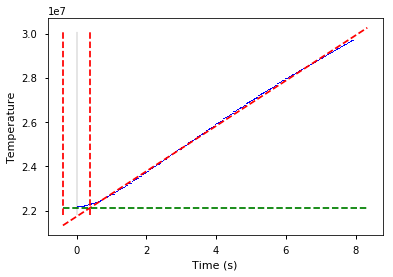

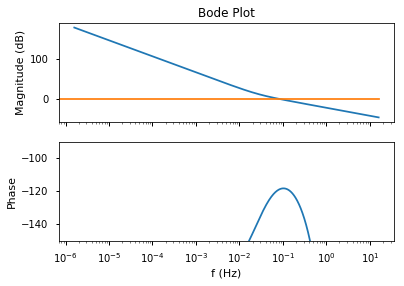

In [7]:
name = "BumpTest_2019-12-19T15:18:43_998219"
time, sig = np.loadtxt(name + ".csv", delimiter = ',', skiprows = 6, unpack=True)
sig = sig#*1e-6
initial_measurement_time = time[:kStartPoints]
initial_measurement_time = initial_measurement_time - initial_measurement_time[0]
initial_measurements = sig[:kStartPoints]

plot_points = 400
time = time[kStartPoints:kStartPoints+plot_points]
time = time - time[0]
sig = sig[kStartPoints:kStartPoints+plot_points]

starty = np.mean(initial_measurements)

slope, delay = FitDelayIntegrator(time, sig, DelaySeed=0.4, SlopeSeed=2, starty = starty)
MakeCharacterizationPlot(name, time, sig, delay, slope, starty, SignalLims = None)

control_gain = slope/kControlSetting
print("Delay: ", delay, "Control Gain: ", control_gain)
MakeStabilityPlot("name", kUpdateRate, delay, slope, starty, PhaseRange)

PrintSummary(kUpdateRate, delay, control_gain)